In [2]:
import nltk
import pandas as pd

In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
nltk.download("stopwords") 
from nltk.corpus import stopwords
nltk.download("words")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alomo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alomo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\alomo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
df = pd.read_csv("amazonreviews.csv")

In [4]:
df.head()

,Unnamed: 0,reviews,Product Links
0,1,Suits more than all my needs. I made all the...,/VivoBook-Touchscreen-Processor-Fingerprint-J4...
1,2,"I got this as a second laptop, mainly to tak...",/VivoBook-Touchscreen-Processor-Fingerprint-J4...
2,3,So right away there's a problem......It cant...,/VivoBook-Touchscreen-Processor-Fingerprint-J4...
3,4,So far this computer has been working as des...,/VivoBook-Touchscreen-Processor-Fingerprint-J4...
4,5,It came with the keyboard disabled. I soent ...,/VivoBook-Touchscreen-Processor-Fingerprint-J4...


In [7]:
#Regular expression tokenizer
tokenizer = nltk.RegexpTokenizer(r'\w+')
txt_1 = df['reviews'][0]

In [8]:
txt_1

'  Suits more than all my needs. I made all the updates yesterday and everything worked fine and today, Google offers me to fulfil the form for the warranty. This notebook flip is very amazing and it is nearly zero noise. It goes up to 2.8Ghz speed, connect to the 5G, battery last all day and it took me only 3 hours for a full charge. It also provides a lot of good apps and tools from Microsoft and Google. So, like I was only expecting a typewriter for my writing work, this one is a real gift for the price. Large screen, metal solid device (a bit heavy compare to the new ones), smooth keys to type, touchscreen works fine and funny flip to use too. To make a long story short, I love it! But in my case, unfortunately for my work, I need more memory.  So I decided to returning it and buy another one.'

In [9]:
tokens = tokenizer.tokenize(txt_1.lower())

In [10]:
tokens

['suits',
 'more',
 'than',
 'all',
 'my',
 'needs',
 'i',
 'made',
 'all',
 'the',
 'updates',
 'yesterday',
 'and',
 'everything',
 'worked',
 'fine',
 'and',
 'today',
 'google',
 'offers',
 'me',
 'to',
 'fulfil',
 'the',
 'form',
 'for',
 'the',
 'warranty',
 'this',
 'notebook',
 'flip',
 'is',
 'very',
 'amazing',
 'and',
 'it',
 'is',
 'nearly',
 'zero',
 'noise',
 'it',
 'goes',
 'up',
 'to',
 '2',
 '8ghz',
 'speed',
 'connect',
 'to',
 'the',
 '5g',
 'battery',
 'last',
 'all',
 'day',
 'and',
 'it',
 'took',
 'me',
 'only',
 '3',
 'hours',
 'for',
 'a',
 'full',
 'charge',
 'it',
 'also',
 'provides',
 'a',
 'lot',
 'of',
 'good',
 'apps',
 'and',
 'tools',
 'from',
 'microsoft',
 'and',
 'google',
 'so',
 'like',
 'i',
 'was',
 'only',
 'expecting',
 'a',
 'typewriter',
 'for',
 'my',
 'writing',
 'work',
 'this',
 'one',
 'is',
 'a',
 'real',
 'gift',
 'for',
 'the',
 'price',
 'large',
 'screen',
 'metal',
 'solid',
 'device',
 'a',
 'bit',
 'heavy',
 'compare',
 'to',
 '

In [13]:
nltk_stpwd = stopwords.words('english')
print(len(set(nltk_stpwd)))
print(nltk_stpwd[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [14]:
stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
print(stopped_tokens[:10])

['suits', 'needs', 'made', 'updates', 'yesterday', 'everything', 'worked', 'fine', 'today', 'google']


In [15]:
df_reviews=df['reviews']

In [17]:
sb_stemmer = nltk.SnowballStemmer('english')

In [18]:
num_reviews = df_reviews.shape[0]
doc_set = [df_reviews[i] for i in range(num_reviews)]
texts = []
for doc in doc_set:
    tokens = tokenizer.tokenize(doc.lower())
    stopped_tokens = [token for token in tokens if not token in nltk_stpwd]
    stemmed_tokens = [sb_stemmer.stem(token) for token in stopped_tokens]
    texts.append(stemmed_tokens)# Adds tokens to new list "texts"
    
print(texts[1])

['got', 'second', 'laptop', 'main', 'take', 'note', '2', '1', 'figur', 'would', 'support', 'pen', 'input', 'first', 'thing', 'first', 'get', 'comput', 'charger', 'box', 'comput', 'metal', 'nice', 'plus', 'price', 'rang', 'howev', 'build', 'qualiti', 'leav', 'lot', 'desir', 'signific', 'keyboard', 'screen', 'flex', 'overal', 'keyboard', 'good', 'also', 'move', 'cap', 'lock', 'indic', 'actual', 'cap', 'lock', 'key', 'chassi', 'trackpad', 'decent', 'size', 'huge', 'fan', 'dedic', 'left', 'right', 'click', 'button', 'know', 'peopl', 'prefer', 'window', 'precis', 'trackpad', 'support', 'window', 'gestur', 'fingerprint', 'scanner', 'recogn', 'finger', 'matter', 'mani', 'time', 'tri', 'term', 'port', 'great', 'microusb', 'port', 'serv', 'usb', '2', '0', 'port', 'micro', 'hdmi', 'port', 'headphon', 'jack', 'one', 'usb', 'c', 'port', 'one', 'sd', 'card', 'reader', 'barrel', 'charg', 'plug', 'understand', 'reason', 'ad', 'microusb', 'microhdmi', 'go', 'use', 'usb', 'c', 'port', 'anyway', 'could'

In [21]:
import gensim
from gensim import corpora 

In [22]:
texts_dict = corpora.Dictionary(texts)

In [24]:
texts_dict.save('reviews.dict') 
print(texts_dict)

Dictionary(7680 unique tokens: ['2', '3', '5g', '8ghz', 'also']...)


In [27]:
print("IDs 1 through 10: {}".format(sorted(texts_dict.token2id.items(), key=operator.itemgetter(1), reverse = False)[:10]))

IDs 1 through 10: [('2', 0), ('3', 1), ('5g', 2), ('8ghz', 3), ('also', 4), ('amaz', 5), ('anoth', 6), ('app', 7), ('batteri', 8), ('bit', 9)]


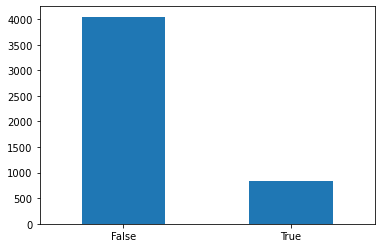

In [31]:
wordcheck = df_reviews.str.contains("price").value_counts()
ax = wordcheck.plot.bar(rot=0)

In [32]:
texts_dict.filter_extremes(no_below=20, no_above=0.10) 
print(sorted(texts_dict.token2id.items(), key=operator.itemgetter(1), reverse = False)[:10])

[('3', 0), ('amaz', 1), ('anoth', 2), ('app', 3), ('bit', 4), ('case', 5), ('charg', 6), ('compar', 7), ('connect', 8), ('day', 9)]


In [33]:
corpus = [texts_dict.doc2bow(text) for text in texts]
len(corpus)

4891

In [34]:
#Save a corpus to disk in the sparse coordinate Matrix Market format in a serialized format instead of random
corpora.MmCorpus.serialize('amzn_review.mm', corpus)

In [35]:
#Step 6: Fit LDA model
lda_model = gensim.models.LdaModel(corpus,alpha='auto', num_topics=5,id2word=texts_dict, passes=20)

In [36]:
lda_model

In [37]:
lda_model.show_topics(num_topics=5,num_words=5)

[(0, '0.059*"de" + 0.046*"la" + 0.033*"que" + 0.033*"un" + 0.024*"en"'),
 (1,
  '0.010*"app" + 0.010*"chromebook" + 0.008*"updat" + 0.008*"day" + 0.008*"problem"'),
 (2,
  '0.009*"qualiti" + 0.008*"perform" + 0.008*"fan" + 0.008*"set" + 0.008*"video"'),
 (3, '0.022*"usb" + 0.018*"port" + 0.010*"touch" + 0.010*"c" + 0.009*"3"'),
 (4,
  '0.018*"support" + 0.017*"amazon" + 0.016*"day" + 0.015*"acer" + 0.014*"month"')]

In [39]:
raw_query = df_reviews[0]
query_words = raw_query.split()

In [40]:
query_words

['Suits',
 'more',
 'than',
 'all',
 'my',
 'needs.',
 'I',
 'made',
 'all',
 'the',
 'updates',
 'yesterday',
 'and',
 'everything',
 'worked',
 'fine',
 'and',
 'today,',
 'Google',
 'offers',
 'me',
 'to',
 'fulfil',
 'the',
 'form',
 'for',
 'the',
 'warranty.',
 'This',
 'notebook',
 'flip',
 'is',
 'very',
 'amazing',
 'and',
 'it',
 'is',
 'nearly',
 'zero',
 'noise.',
 'It',
 'goes',
 'up',
 'to',
 '2.8Ghz',
 'speed,',
 'connect',
 'to',
 'the',
 '5G,',
 'battery',
 'last',
 'all',
 'day',
 'and',
 'it',
 'took',
 'me',
 'only',
 '3',
 'hours',
 'for',
 'a',
 'full',
 'charge.',
 'It',
 'also',
 'provides',
 'a',
 'lot',
 'of',
 'good',
 'apps',
 'and',
 'tools',
 'from',
 'Microsoft',
 'and',
 'Google.',
 'So,',
 'like',
 'I',
 'was',
 'only',
 'expecting',
 'a',
 'typewriter',
 'for',
 'my',
 'writing',
 'work,',
 'this',
 'one',
 'is',
 'a',
 'real',
 'gift',
 'for',
 'the',
 'price.',
 'Large',
 'screen,',
 'metal',
 'solid',
 'device',
 '(a',
 'bit',
 'heavy',
 'compare',


In [44]:
query = []
for word in df_reviews[0]:
    q_tokens = tokenizer.tokenize(word.lower())
    q_stopped_tokens = [word for word in q_tokens if not word in nltk_stpwd]
    q_stemmed_tokens = [sb_stemmer.stem(word) for word in q_stopped_tokens]
    query.append(q_stemmed_tokens[0])
print(query)

IndexError: list index out of range

In [47]:
# Words in query will be converted to ids and frequencies  
id2word = gensim.corpora.Dictionary()
_= id2word.merge_with(texts_dict) # garbage
# Convert this document into (word, frequency) pairs
query = id2word.doc2bow(query)
print(query)
#Create a sorted list
sorted_list = list(sorted(lda_model[query], key=lambda x: x[1]))
sorted_list
#Assessing least related topics
lda_model.print_topic(a[0][0]) #least related
#Assessing most related topics
lda_model.print_topic(a[-1][0])

[]


TypeError: 'int' object is not iterable

In [45]:
raw_query = 'laptops'

query_words = raw_query.split()
query = []
for word in query_words:
    # ad-hoc reuse steps from above
    q_tokens = tokenizer.tokenize(word.lower())
    q_stopped_tokens = [word for word in q_tokens if not word in nltk_stpwd]
    q_stemmed_tokens = [sb_stemmer.stem(word) for word in q_stopped_tokens]
    query.append(q_stemmed_tokens[0])
    
print(query)


['laptop']


In [26]:
from gensim.models import LdaModel # To use the LDA model
import operator

In [11]:
# PRE-PROCESSING:REMOVING STOPWORDS,NON-ENGLISH WORDS AND LEMMATIZING AND FILTERING WORDS WITH LENGTH LESS THAN 3.
def remove_underscores(sentence):
    sentence= sentence.replace("_"," ")
    return sentence

stop_words = set(stopwords.words('english'))
english_words = set(nltk.corpus.words.words())

def remove_extra_words(sentence):     #remove stop words and meaningless words
    new_sentence=""
    for w in sentence.split():
        w=w.lower()
        if w in english_words and w not in stop_words and w.isalpha():
            new_sentence=new_sentence+" "+w
    return new_sentence

def lemmatize_and_filter(sentence, min_word_length):        #to lemmatize words and lose the ones with length less than equal to 3.
    sent = ""
    for word in sentence.split():
        word=word.lower()
        if len(lemmatizer.lemmatize(word))>3:
            sent= sent+" "+lemmatizer.lemmatize(word)
    return(sent)

In [12]:
def split_label_review(data):
    #takes in list of raw data and returns list of string sentences and the list of their corresponding labels.
    labels = [int(re.findall("1|2", str(lines))[0]) for lines in data]
    reviews = [re.split("__label__[1|2]",str(lines))[1].strip().lower() for lines in data]
    return(reviews,labels)


def preprocessed_data(data):        #takes in list of raw data and returns list of processed string sentences and the list of their corresponding labels.
    reviews = [lemmatize_and_filter(remove_extra_words(BeautifulSoup(re.sub(r'[^\w\s]|^https?:\/\/.*[\r\n]*|\d+', '', remove_underscores(str(lines)).strip().lower()), "lxml").text),3) for lines in data]
    return(reviews)

In [13]:
#  **TRAIN-VALIDATION SPLIT**

def split_train_into_tain_validate(data_,validation_ratio):
    
    data=data_
    
    train_size = int(len(data)*(1-validation_ratio))
    
    random.shuffle(data)

    validate_samples= data[train_size:]

    data = data[:train_size]
    
    return(data,validate_samples)

In [14]:
# **NEGATIVE POSITIVE SPLIT**
#SPLITING THE DATA INTO POSITIVE AND NEGATIVE REVIEWS SEPARATELY.
import re
def split_into_negative_positive(data):
    negative_reviews=[]      # list of all negative reviews
    positive_reviews=[]      # list of all positive reviews

    for lines in train_file_lines:
        lines= str(lines).lower()
        x=re.findall("1|2", lines)[0]
        if x=="1":
            negative_reviews.append(lines)
        elif x=="2":
            positive_reviews.append(lines)
    return(negative_reviews, positive_reviews)

In [ ]:
negative_reviews,positive_reviews= split_into_negative_positive(train_file_lines)

negative_reviews,labels = split_label_review(negative_reviews)
print("First few negative reviews:",negative_reviews[:5])
negative_reviews=preprocessed_data(negative_reviews)

positive_reviews,labels = split_label_review(positive_reviews)
print("First few positive reviews:",positive_reviews[:5])
positive_reviews=preprocessed_data(positive_reviews)

del positive_reviews, negative_reviews,labels